In [14]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load dataset
df = pd.read_csv('../data/processed_data/TSLA_date_converted.csv')
df.head()

,Open,High,Low,Close,Adj Close,Volume
0,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,20.000000,20.00,15.830000,16.110001,16.110001,6866900


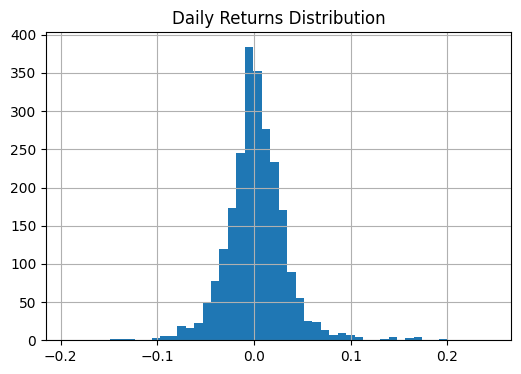

In [4]:
# create 'Returns' column
df['Returns'] = df['Adj Close'].pct_change()

plt.figure(figsize=(6,4))
df['Returns'].hist(bins=50)
plt.title("Daily Returns Distribution")
plt.show()

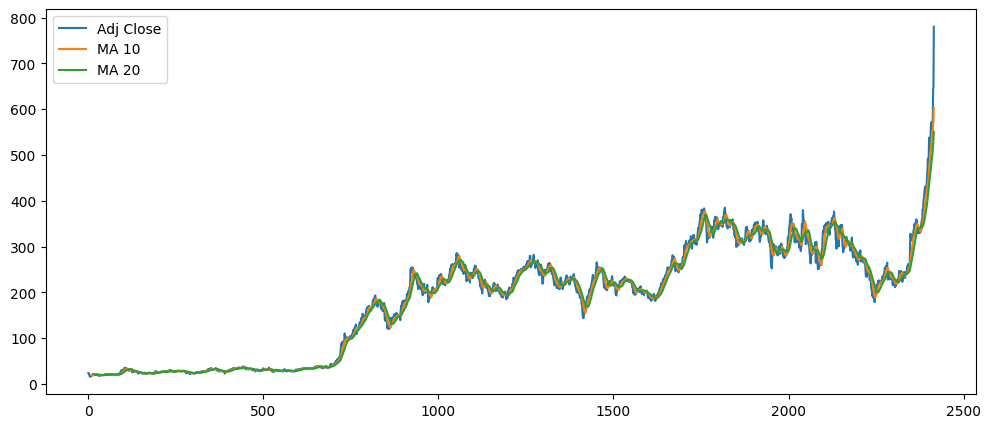

In [22]:
# Rolling statistics
df['ma_10'] = df['Adj Close'].rolling(window=10).mean()
df['ma_20'] = df['Adj Close'].rolling(window=20).mean()

df['volatility_10'] = df['Returns'].rolling(window=10).std()

plt.figure(figsize=(12,5))
plt.plot(df.index, df['Adj Close'], label='Adj Close')
plt.plot(df.index, df['ma_10'], label='MA 10')
plt.plot(df.index, df['ma_20'], label='MA 20')
plt.legend()
plt.show()

In [23]:
# by rolling ops we get some NaNs we need to fill them with 0
df.fillna(0, inplace=True)

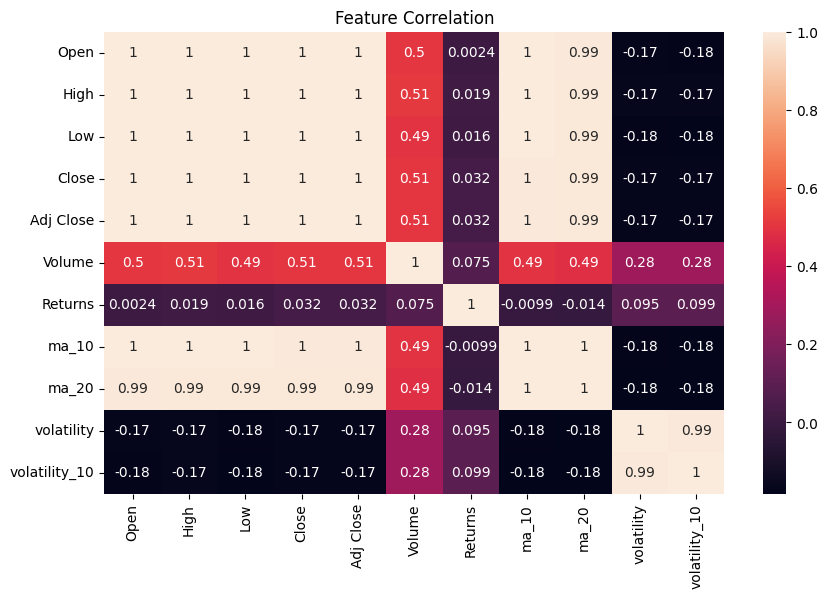

In [24]:
# check correlation
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True)
plt.title('Feature Correlation')
plt.show()

In [25]:
# final features 
FEATURES = [
    'Open', 'High', 'Low', 'Close',
    'Volume',
    'Returns', 'ma_10', 'ma_20', 'volatility_10'
]

TARGET = ['Adj Close']

In [26]:
df[FEATURES + TARGET].to_csv('../data/processed_data/feat_engg.csv', index=False)